# conf


Statistiques pour la discipline AGRI :
   prism:aggregationType   count
0                Journal  219940
1          Trade Journal     215
2            Book Series    4096
3                   Book    6500
4  Conference Proceeding    1534

--------------------------------------------------



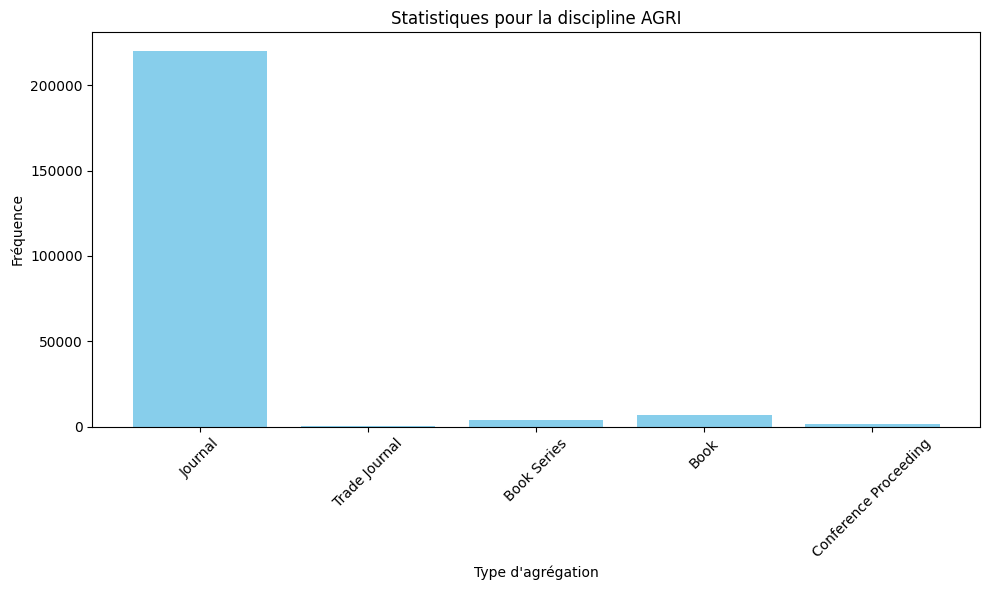


Statistiques pour la discipline ARTS :
   prism:aggregationType  count
0                Journal  92971
1            Book Series   7709
2  Conference Proceeding   5715
3                   Book  13268
4          Trade Journal     27

--------------------------------------------------



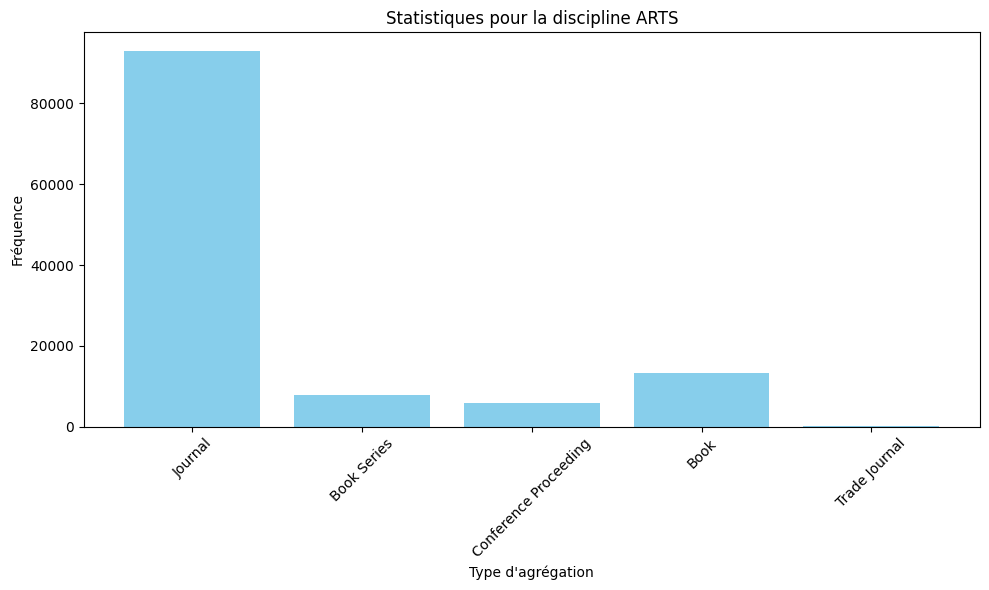


Statistiques pour la discipline BIOC :
   prism:aggregationType   count
0                Journal  482637
1            Book Series    9171
2          Trade Journal     167
3                   Book    5685
4  Conference Proceeding     846

--------------------------------------------------



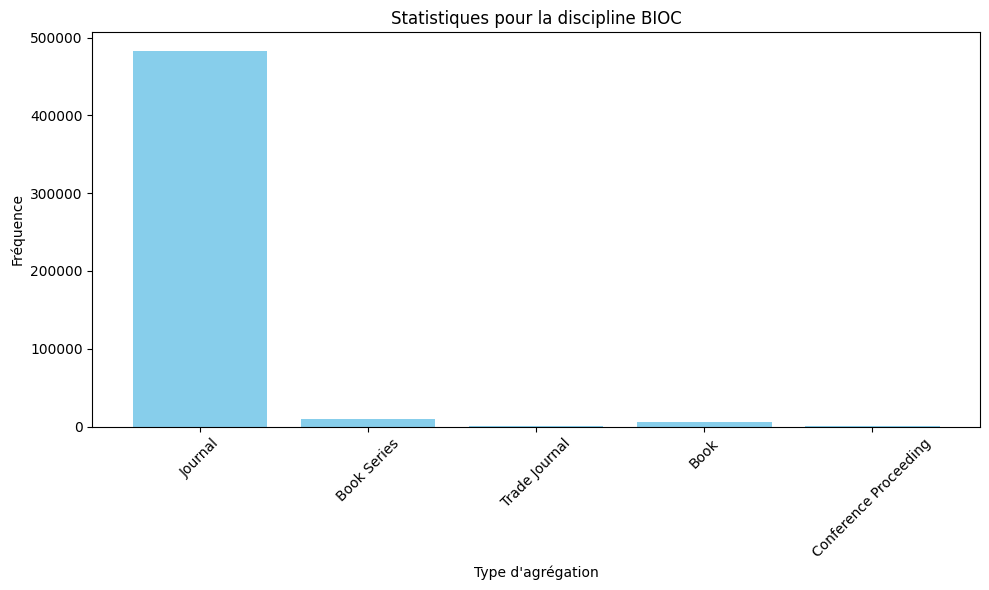


Statistiques pour la discipline BUSI :
   prism:aggregationType  count
0                Journal  41479
1          Trade Journal    813
2  Conference Proceeding   3095
3                   Book  10022
4            Book Series   1961

--------------------------------------------------



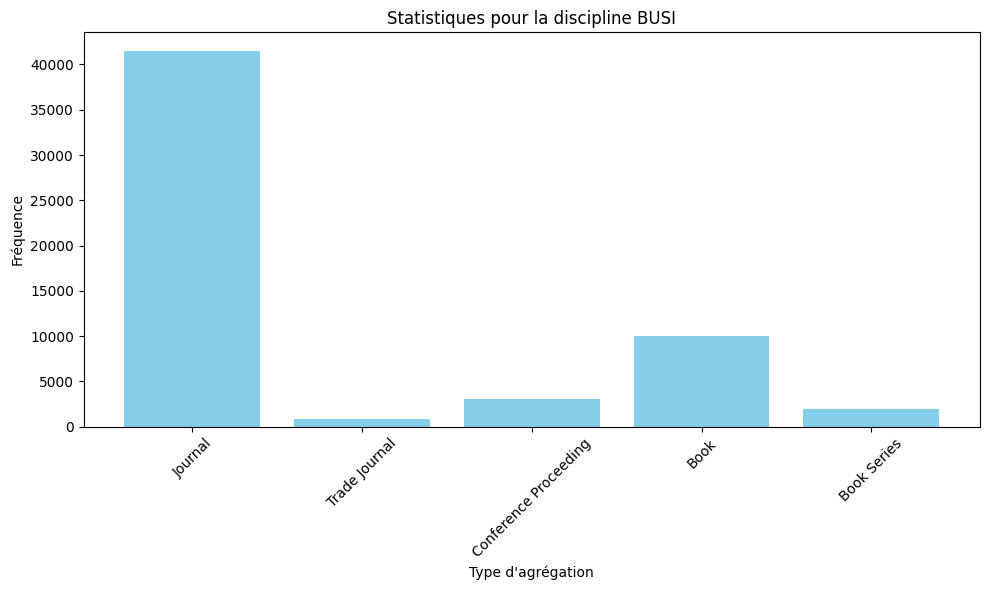


Statistiques pour la discipline CENG :
   prism:aggregationType   count
0                Journal  122393
1            Book Series    5314
2          Trade Journal     673
3  Conference Proceeding    5308
4                   Book    1403

--------------------------------------------------



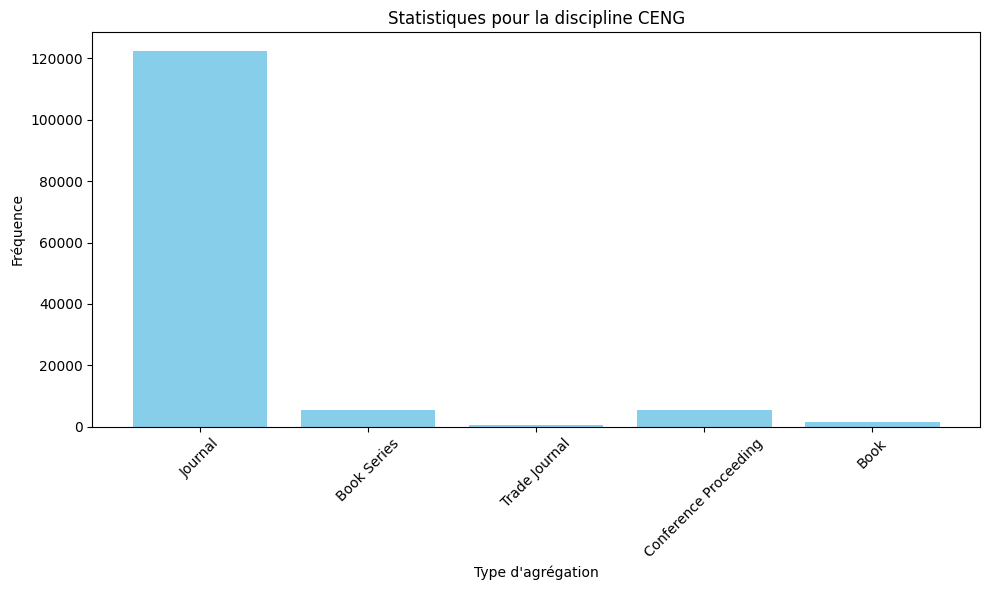


Statistiques pour la discipline COMP :
   prism:aggregationType   count
0                Journal  125107
1  Conference Proceeding  166904
2            Book Series   51621
3          Trade Journal     662
4                   Book    4516
5                 Report       2

--------------------------------------------------



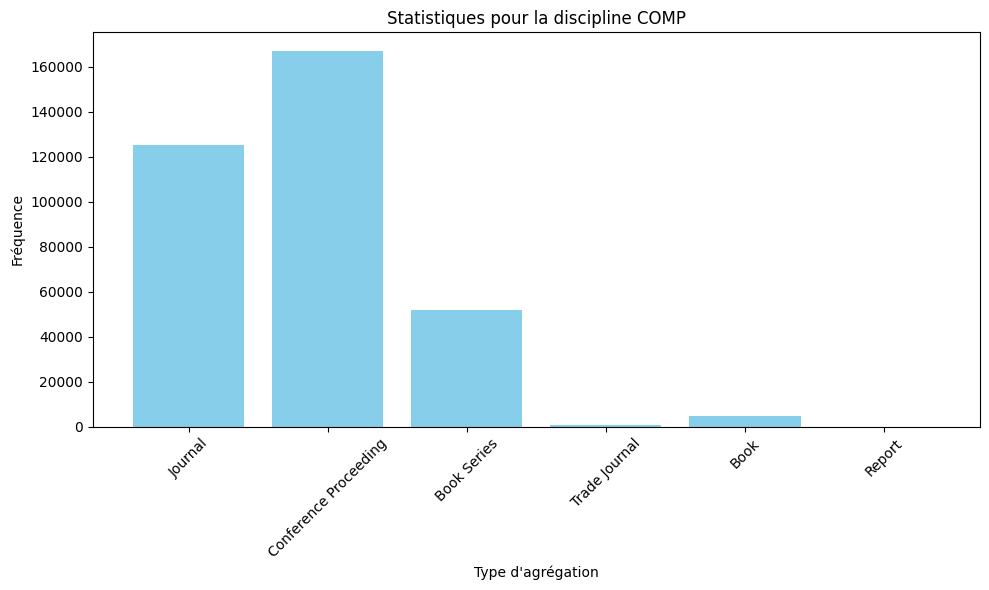


Statistiques pour la discipline DECI :
   prism:aggregationType  count
0                Journal  27409
1  Conference Proceeding   8468
2            Book Series   3362
3                   Book     28
4          Trade Journal     13

--------------------------------------------------



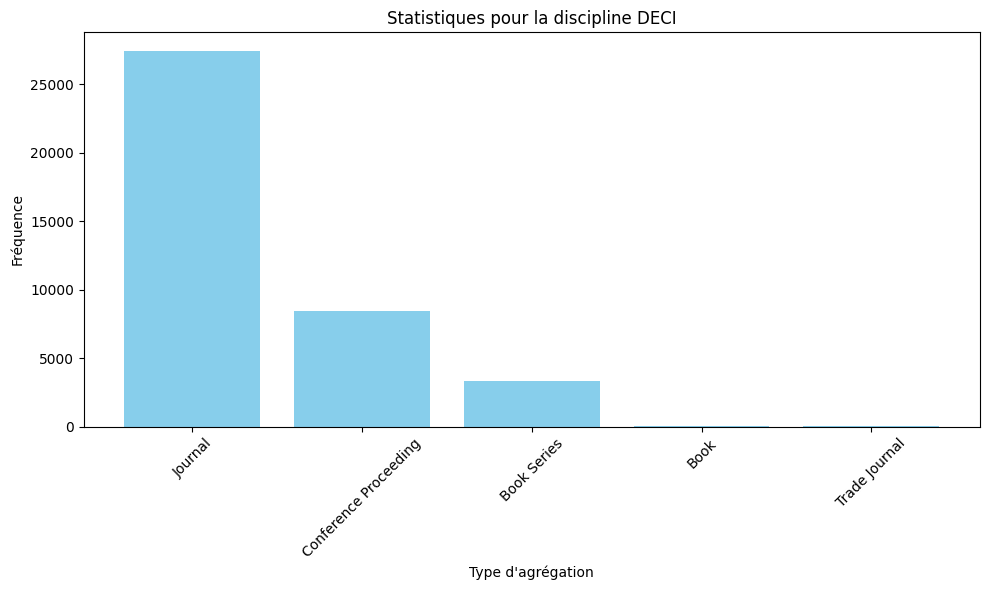


Statistiques pour la discipline DENT :
   prism:aggregationType  count
0                Journal   7146
1  Conference Proceeding      8
2                   Book    438
3            Book Series      4

--------------------------------------------------



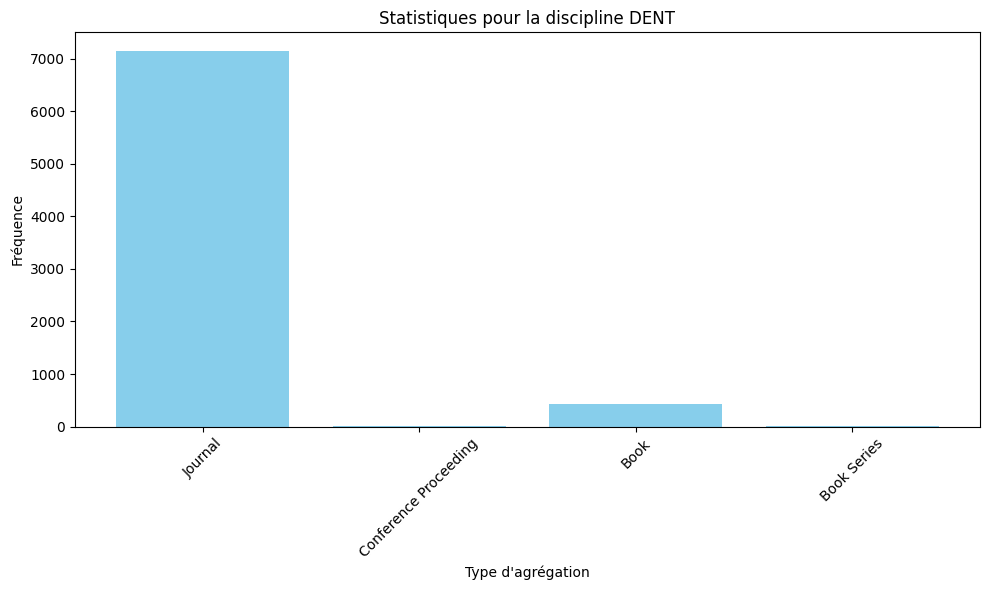


Statistiques pour la discipline EART :
   prism:aggregationType   count
0                Journal  182062
1  Conference Proceeding   22789
2            Book Series    6735
3          Trade Journal     293
4                   Book    5539

--------------------------------------------------



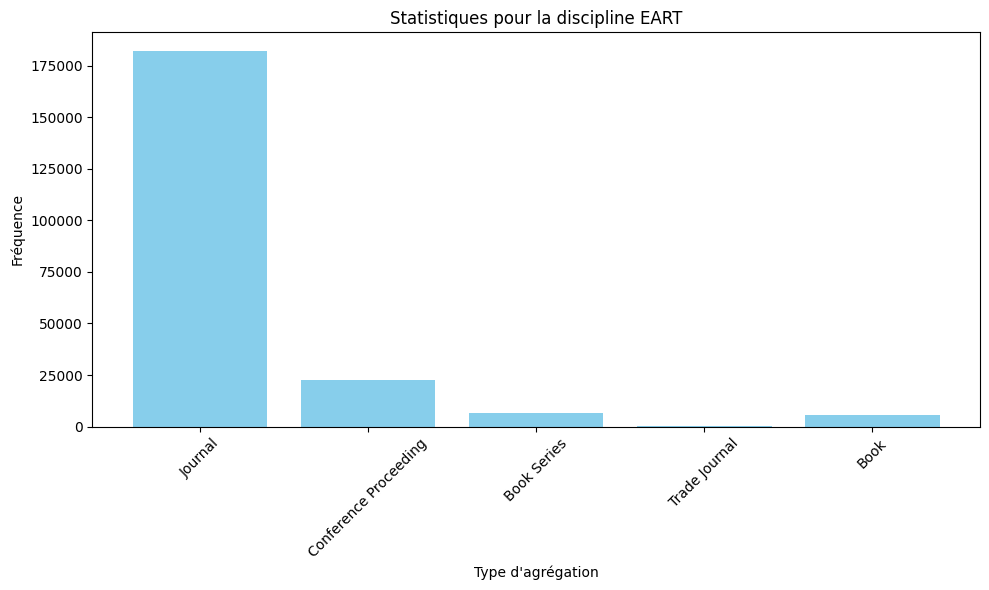


Statistiques pour la discipline ECON :
   prism:aggregationType  count
0                Journal  46690
1                   Book  10205
2            Book Series    989
3          Trade Journal     58
4  Conference Proceeding    192
5                 Report      1

--------------------------------------------------



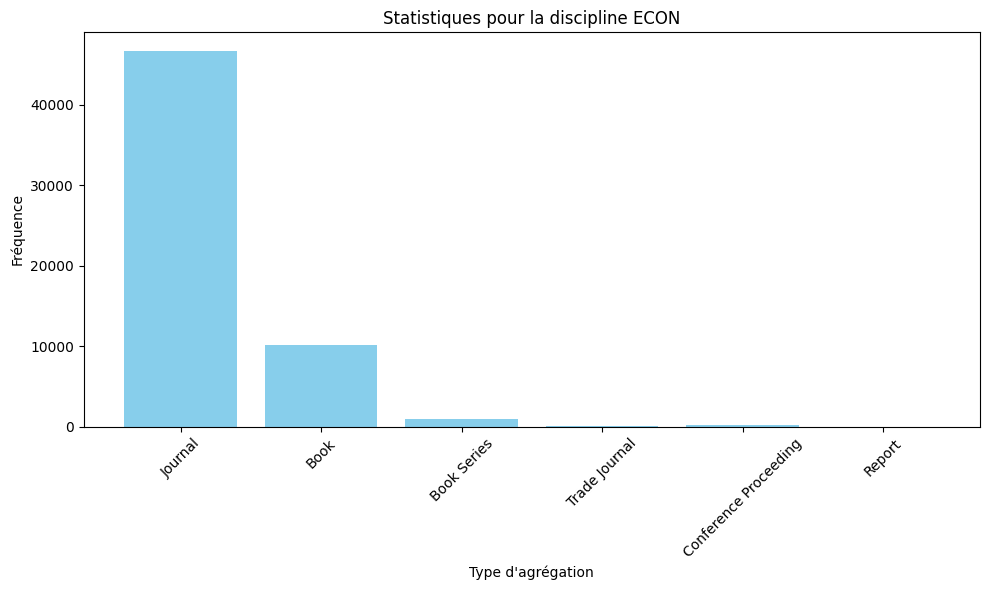


Statistiques pour la discipline ENER :
   prism:aggregationType  count
0  Conference Proceeding  19711
1                Journal  53180
2          Trade Journal    617
3                 Report      3
4            Book Series   1146
5                   Book    739

--------------------------------------------------



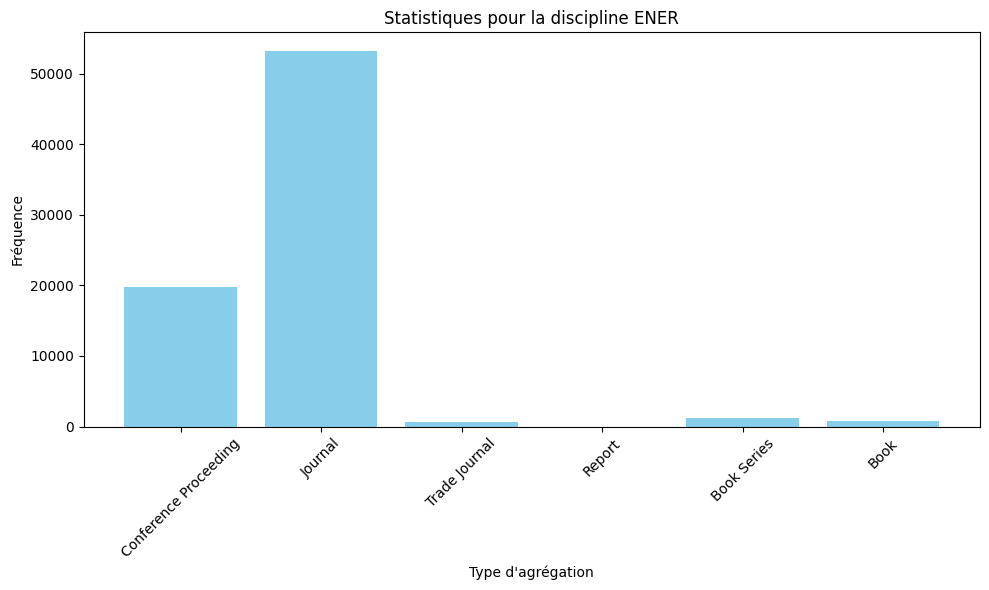


Statistiques pour la discipline ENGI :
   prism:aggregationType   count
0            Book Series   18481
1                Journal  288533
2  Conference Proceeding  191225
3          Trade Journal    3040
4                   Book   15646
5                 Report      17

--------------------------------------------------



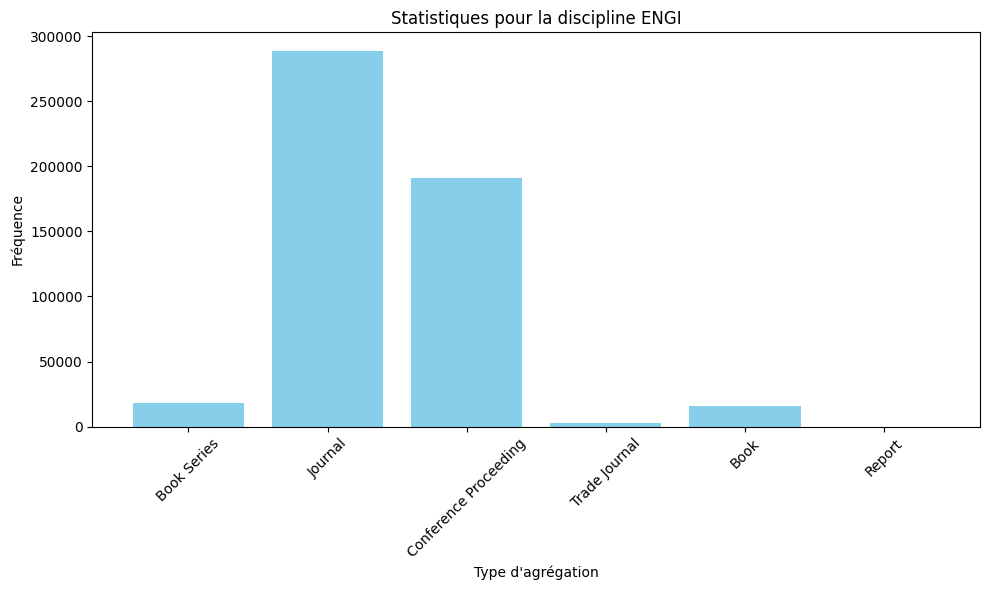


Statistiques pour la discipline ENVI :
   prism:aggregationType   count
0                Journal  137390
1            Book Series    3214
2  Conference Proceeding    6239
3                   Book    6707
4          Trade Journal     493

--------------------------------------------------



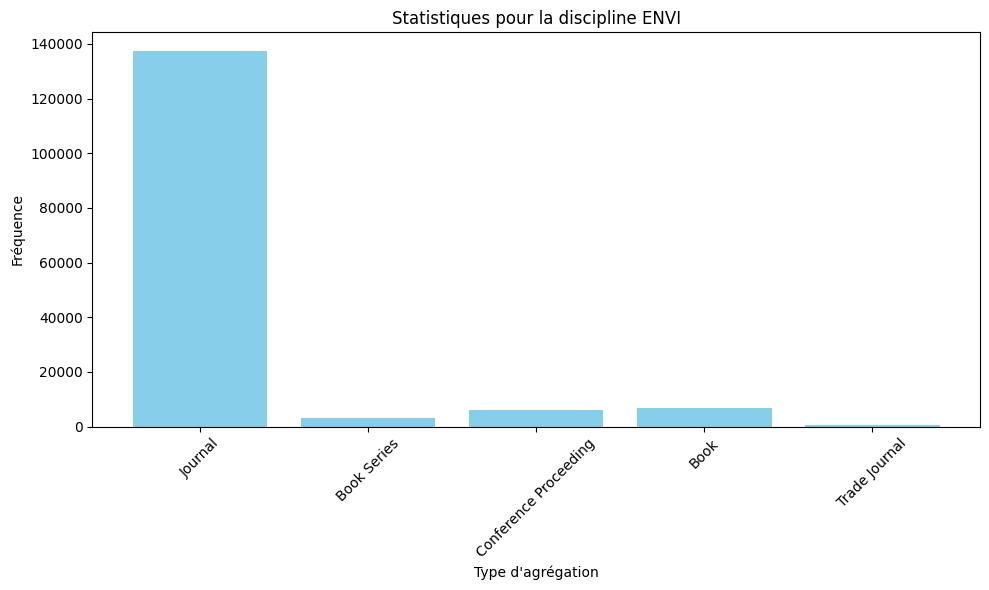


Statistiques pour la discipline HEAL :
   prism:aggregationType  count
0                Journal  32906
1            Book Series   1244
2  Conference Proceeding    795
3                   Book    567
4          Trade Journal     52

--------------------------------------------------



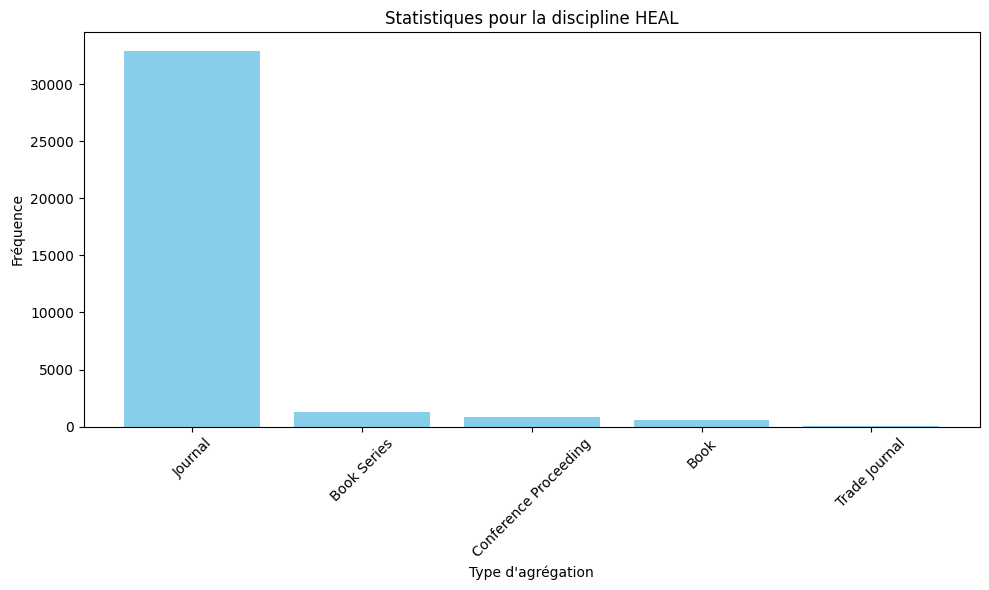


Statistiques pour la discipline IMMU :
   prism:aggregationType   count
0                Journal  130612
1            Book Series     720
2                   Book    1604
3          Trade Journal      15
4  Conference Proceeding      17

--------------------------------------------------



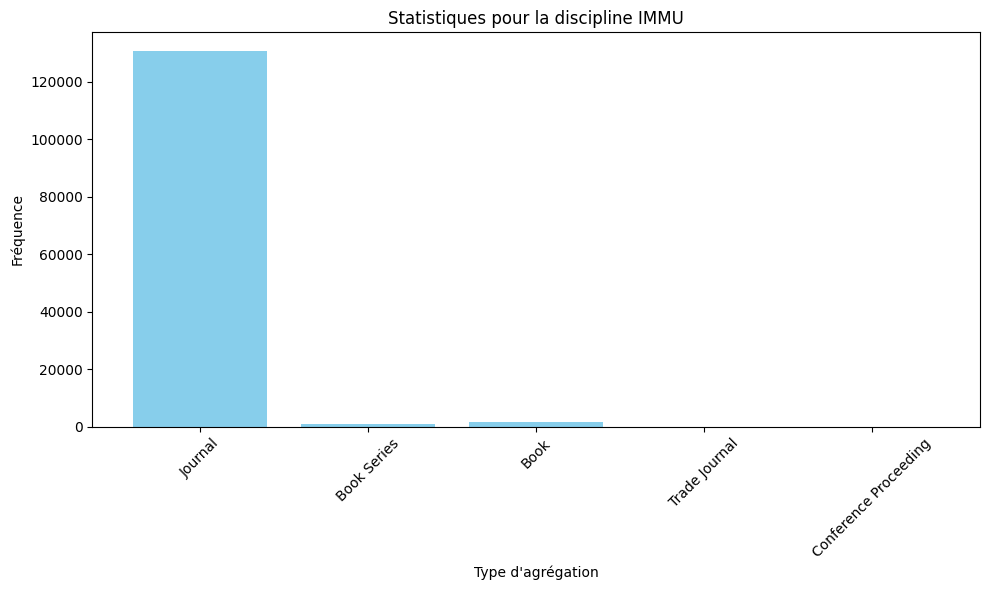


Statistiques pour la discipline MATE :
   prism:aggregationType   count
0                Journal  289084
1            Book Series    8535
2  Conference Proceeding   55450
3          Trade Journal    1962
4                   Book    3621

--------------------------------------------------



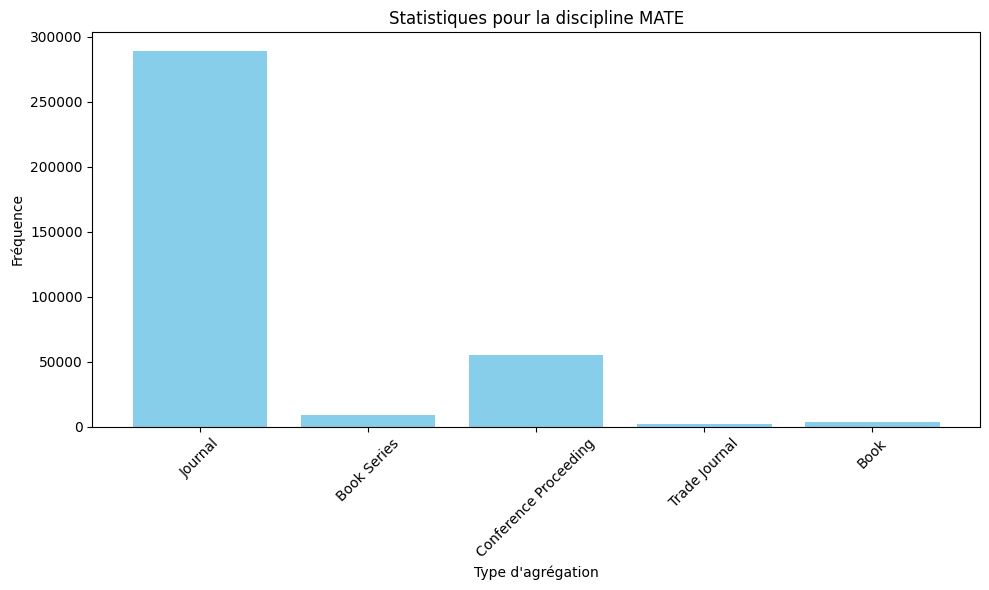


Statistiques pour la discipline MATH :
   prism:aggregationType   count
0                Journal  189242
1            Book Series   49429
2  Conference Proceeding   53948
3                   Book    2520
4          Trade Journal       3

--------------------------------------------------



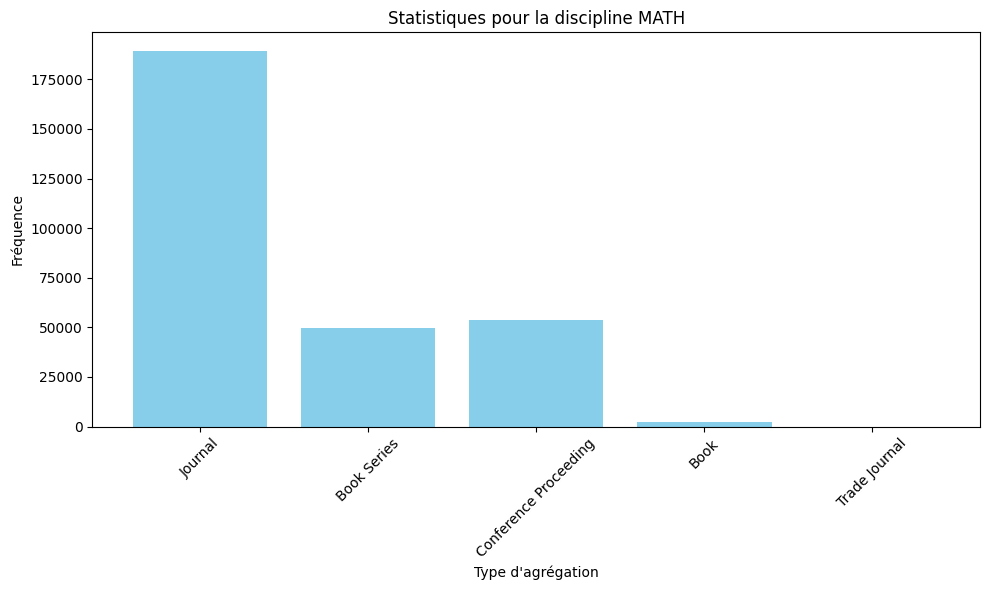


Statistiques pour la discipline MEDI :
               prism:aggregationType    count
0                            Journal  1028313
1                        Book Series     4502
2                               Book    14462
3              Conference Proceeding     8307
4                      Trade Journal       28
5   'affiliation-country': 'france'}        1

--------------------------------------------------



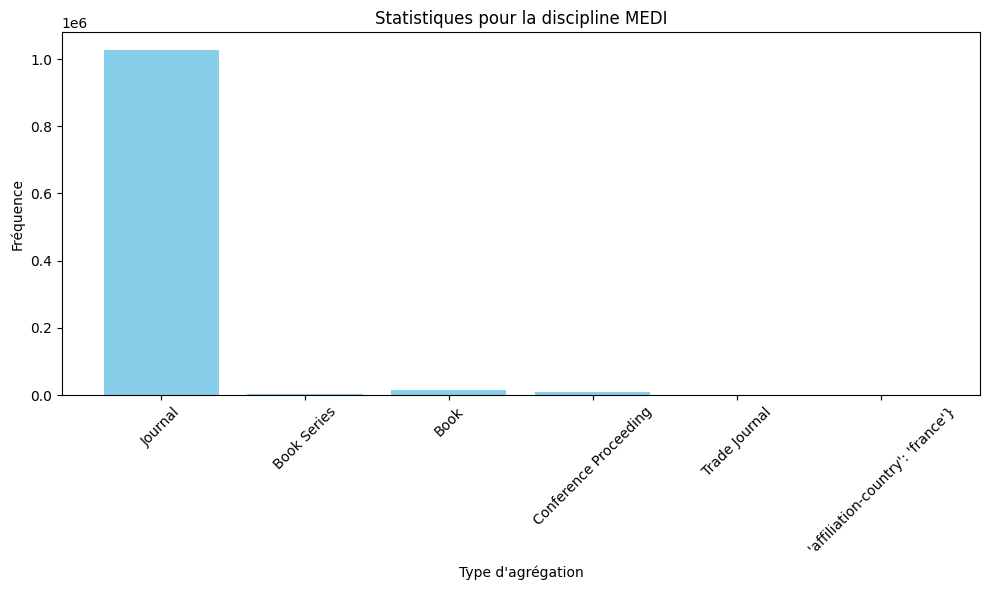


Statistiques pour la discipline MULT :
   prism:aggregationType  count
0                Journal  50011
1  Conference Proceeding   3189
2          Trade Journal      5
3            Book Series    128
4                   Book     15

--------------------------------------------------



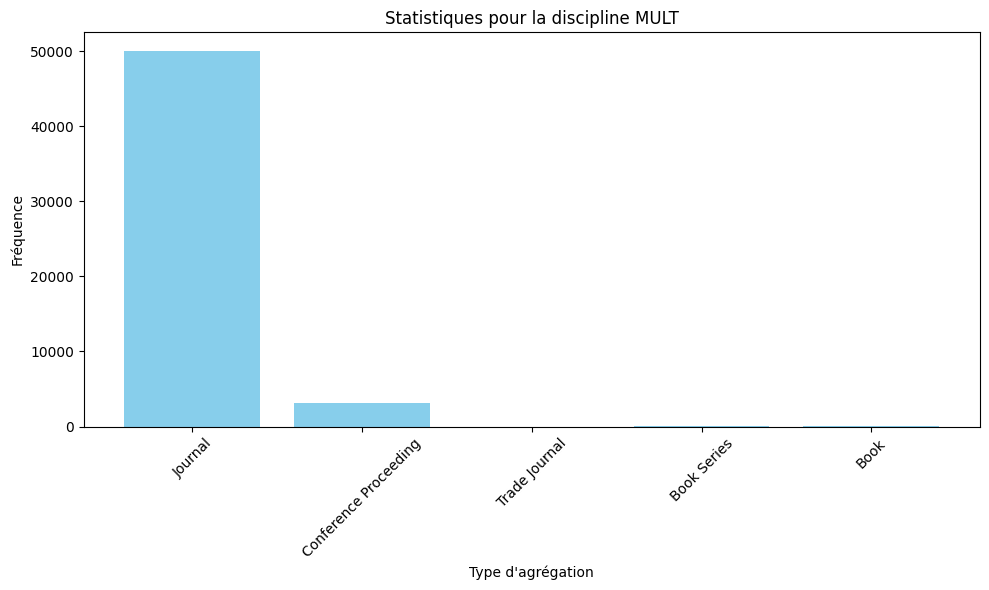


Statistiques pour la discipline NEUR :
   prism:aggregationType  count
0                Journal  96738
1            Book Series   3583
2  Conference Proceeding    528
3                   Book   1432

--------------------------------------------------



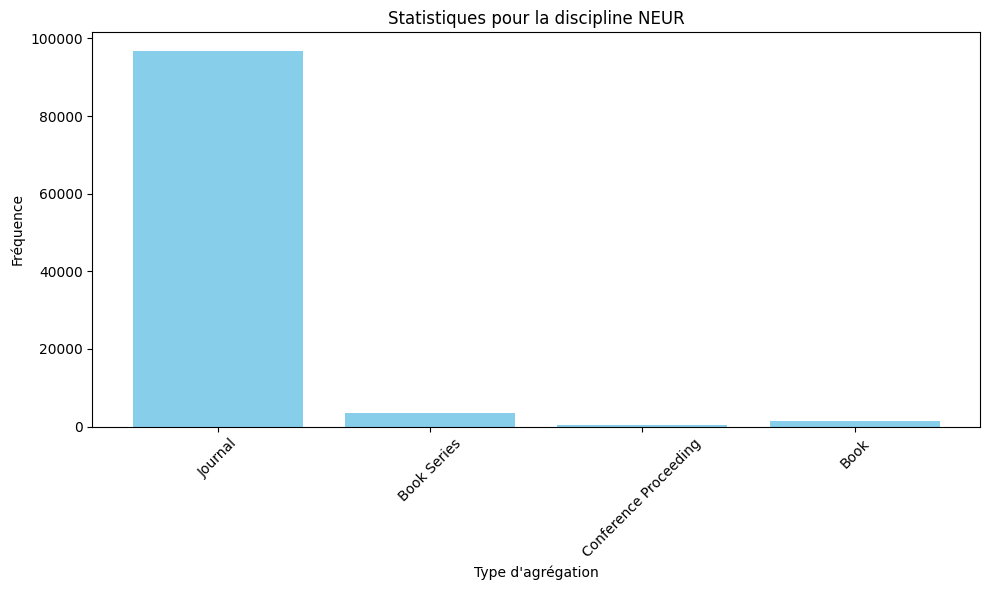


Statistiques pour la discipline NURS :
   prism:aggregationType  count
0                Journal  50710
1            Book Series    154
2                   Book    175
3          Trade Journal     88
4  Conference Proceeding      2

--------------------------------------------------



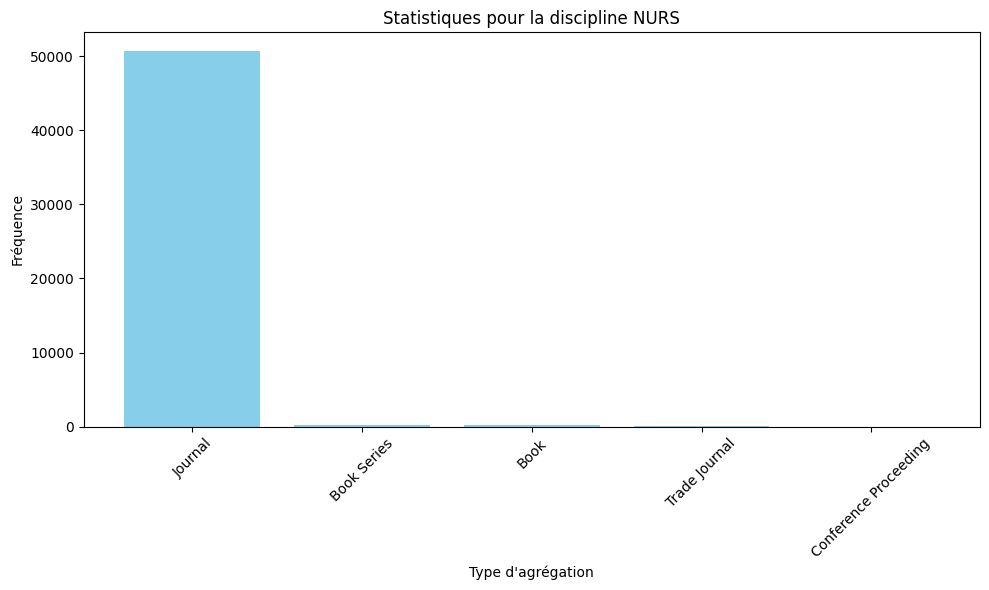


Statistiques pour la discipline PHAR :
   prism:aggregationType   count
0                Journal  105472
1            Book Series     574
2                   Book     933
3          Trade Journal     287
4  Conference Proceeding      31

--------------------------------------------------



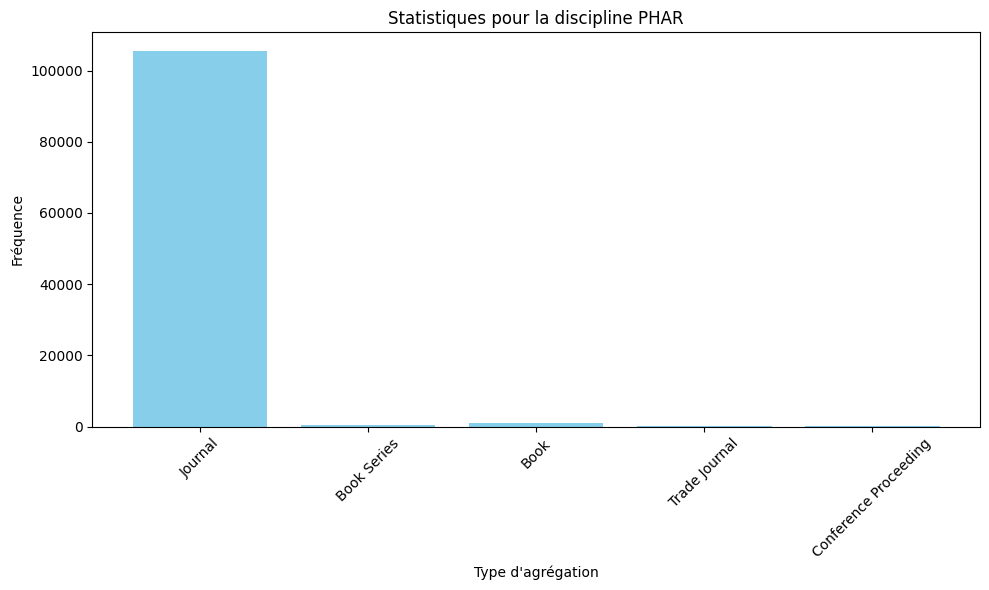


Statistiques pour la discipline PHYS :
   prism:aggregationType   count
0                Journal  490591
1          Trade Journal     548
2            Book Series    9877
3  Conference Proceeding   87382
4                   Book    3704
5                 Report       3

--------------------------------------------------



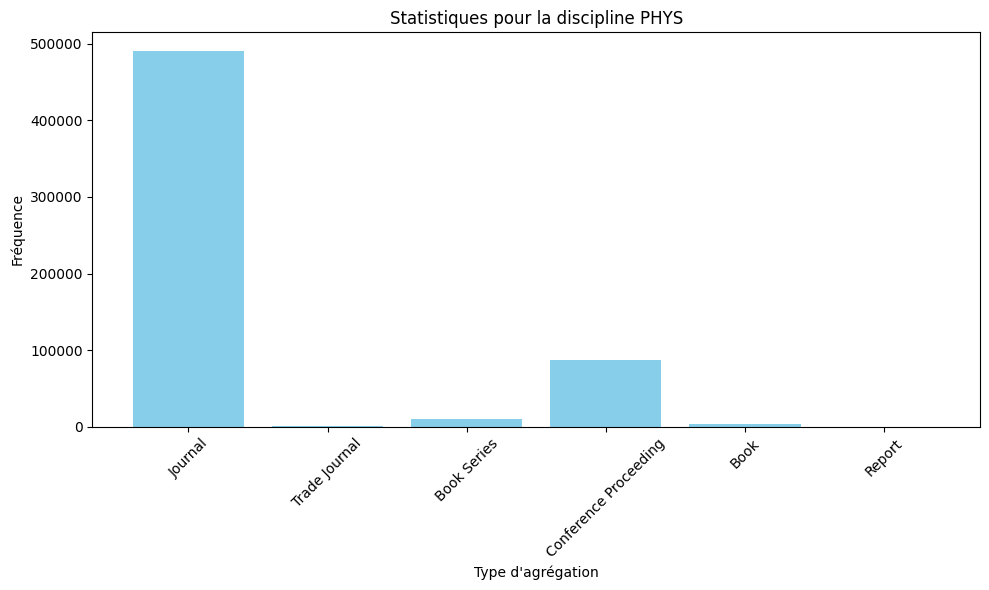


Statistiques pour la discipline PSYC :
   prism:aggregationType  count
0                Journal  62453
1            Book Series    302
2                   Book   2002
3  Conference Proceeding    293

--------------------------------------------------



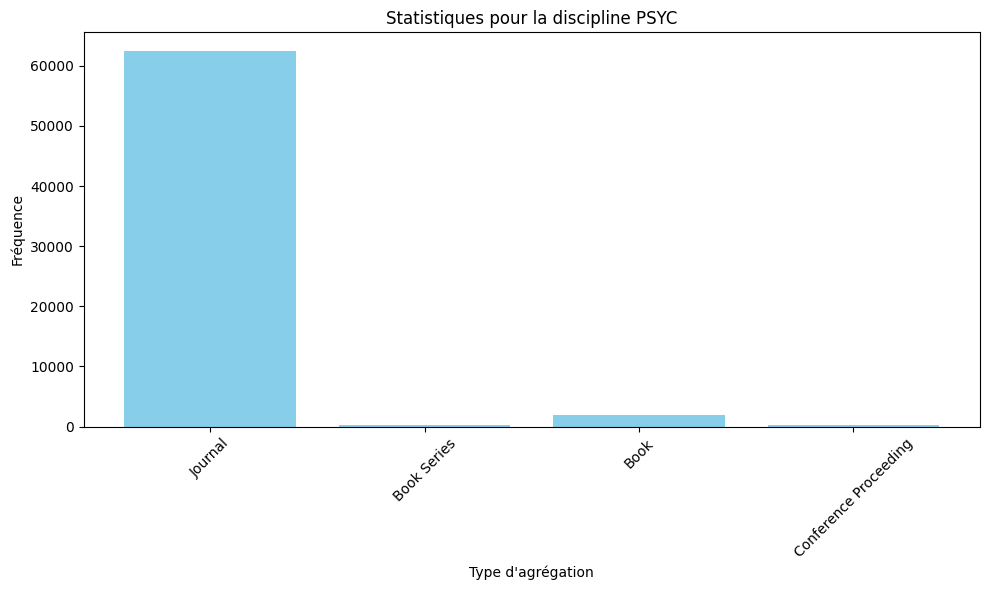


Statistiques pour la discipline SOCI :
   prism:aggregationType   count
0                Journal  141763
1  Conference Proceeding   13862
2          Trade Journal     145
3            Book Series    6442
4                   Book   20077

--------------------------------------------------



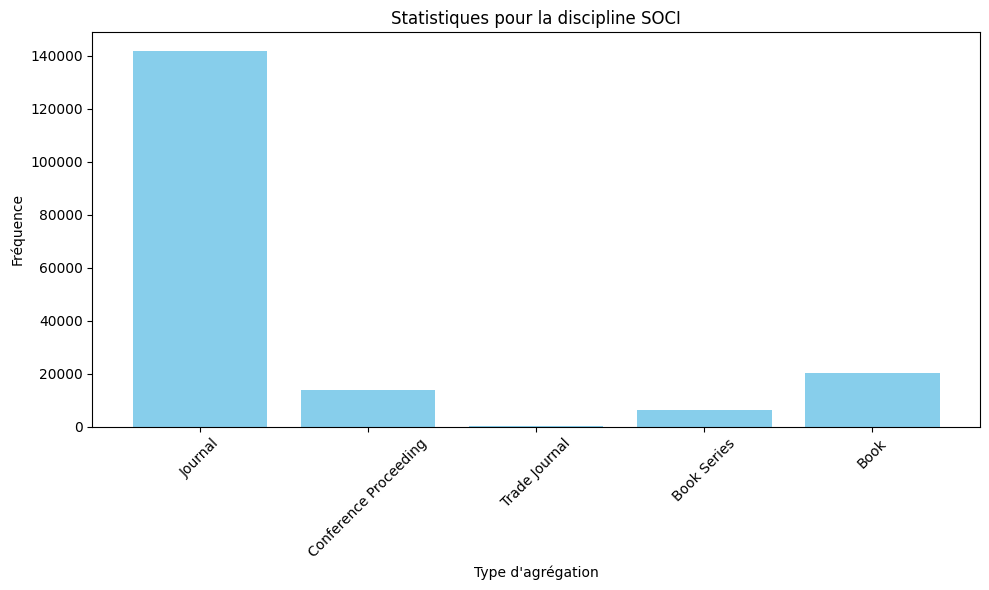


Statistiques pour la discipline VETE :
   prism:aggregationType  count
0                Journal  23126
1            Book Series     15
2                   Book    308
3  Conference Proceeding     12

--------------------------------------------------



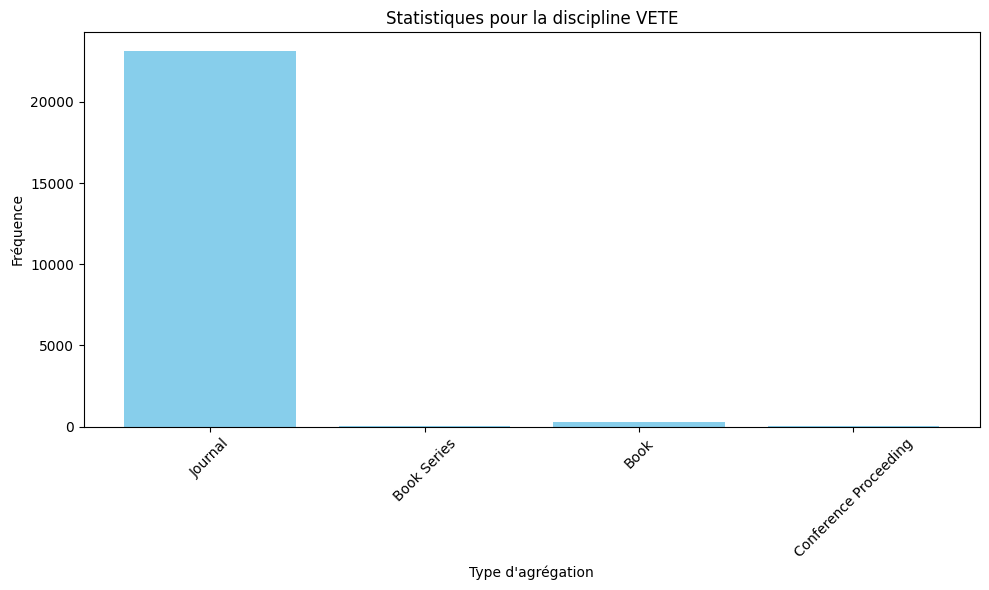

In [5]:
import polars as pl
from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter

# Dossier où sont stockés les CSV
folder_path = Path('./data/scopus')

# Initialiser un dictionnaire pour stocker les statistiques par discipline
stats_per_discipline = {}

# Liste des colonnes à charger pour éviter les erreurs (on exclut ici 'author_info')
cols_to_load = [
    'prism:aggregationType', 'prism:eIssn', 'prism:issn', 
    'prism:issueIdentifier', 'prism:coverDisplayDate'
]

# Parcourir chaque fichier CSV dans le dossier
for file_path in folder_path.glob("*.csv"):
    try:
        # Lire le fichier CSV avec Polars en chargeant uniquement les colonnes nécessaires
        df = pl.read_csv(
            file_path,
            columns=cols_to_load,
            encoding="ISO-8859-1",
            ignore_errors=True
        )
        
        # Vérifier si la colonne 'prism:aggregationType' existe
        if 'prism:aggregationType' in df.columns:
            # Compter les occurrences de chaque type dans 'prism:aggregationType' en filtrant les valeurs None
            counts = Counter(val for val in df['prism:aggregationType'] if val is not None)
            
            # Ajouter les résultats au dictionnaire avec le nom de la discipline
            discipline_name = file_path.stem  # Utiliser le nom du fichier sans extension comme nom de la discipline
            stats_per_discipline[discipline_name] = counts

    except Exception as e:
        print(f"Erreur lors de la lecture du fichier {file_path.name}: {e}")

# Affichage des statistiques pour chaque discipline avec Matplotlib et print
for discipline, counts in stats_per_discipline.items():
    # Convertir les résultats du compteur en DataFrame pour Matplotlib
    stats_df = pl.DataFrame({
        'prism:aggregationType': list(counts.keys()),
        'count': list(counts.values())
    }).to_pandas()
    
    print(f"\nStatistiques pour la discipline {discipline} :")
    print(stats_df)
    print("\n" + "-" * 50 + "\n")
    
    # Créer le graphique
    plt.figure(figsize=(10, 6))
    plt.bar(stats_df['prism:aggregationType'], stats_df['count'], color='skyblue')
    plt.xlabel("Type d'agrégation")
    plt.ylabel("Fréquence")
    plt.title(f"Statistiques pour la discipline {discipline}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
